In [1]:
from datacube import Datacube
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.gridspec as gridspec

cdc = Datacube(config='/g/data/u46/users/ext547/ewater/cambodia_cube/cambodia.conf')

import sys
import os.path
sys.path.append(os.path.expanduser('/g/data/u46/users/ext547/ewater/notebooks/dea-notebooks/other_notebooks/dea-notebooks/10_Scripts'))
import DEAPlotting
import DEADataHandling

In [2]:
#Define function to create subplots of all scenes within an array as subplots
def one_band_image_subplots(ds, num_cols, figsize = [10,40], left  = 0.125, 
                              right = 0.9, bottom = 0.1, top = 0.9, 
                              wspace = 0.2, hspace = 0.4):
    '''
    one_band_image_subplots takes a dataset with one band and multiple time steps, 
    and plots them in image. 
    Last modified: March 2018
    Author: Mike Barnes
    Modified by: Claire Krause and Erin Telfer
    
    Inputs: 
    ds -   Dataset containing the bands to be plotted
    num_cols - number of columns for the subplot
    
    Optional:
    figsize - dimensions for the output figure
    left  - the space on the left side of the subplots of the figure
    right - the space on the right side of the subplots of the figure
    bottom - the space on the bottom of the subplots of the figure
    top - the space on the top of the subplots of the figure
    wspace - the amount of width reserved for blank space between subplots
    hspace - the amount of height reserved for white space between subplots
    '''
    # Find the number of rows/columns we need, based on the number of time steps in ds
    fig = plt.figure(figsize = figsize)
    timesteps = ds.time.size
    num_rows = int(np.ceil(timesteps/num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize = figsize)
    fig.subplots_adjust(left  = left, right = right, bottom = bottom, top = top, 
                        wspace = wspace, hspace = hspace)
    try: #loop through all scenes, prepare imagery and create subplots
        for i, ax in enumerate(fig.axes):
            image_ds = ds.PET.isel(time =i)
            ax.set_title(str(image_ds.time.values)[0:10])
            ax.imshow(image_ds, interpolation = 'nearest') #plot image as subplot
    except IndexError: #if there are an odd number of plots, this code will allow plotting of images
        fig.delaxes(ax)
        plt.draw() 

In [3]:
#define temporal range ()
start_of_epoch = '1990-01-01'
end_of_epoch =  '1991-01-01'

query = {'time': (start_of_epoch, end_of_epoch),}

# lat_min = 13.5 #down
# lat_max = 22.5 #up
# lon_min = 99.5 #left
# lon_max = 108.0 #right 


# query['x'] = (lon_min, lon_max)
# query['y'] = (lat_max, lat_min)
# query['crs'] = 'EPSG:4326'

print(query)

{'time': ('1990-01-01', '1991-01-01')}


In [4]:
#cc_product = 'rainfall_grids_1998_2017'
cc_product = 'pet_grids_1979_2016'
#cc_product = 'temperature_grids_1979_2016'

In [5]:
ds = cdc.load(cc_product, **query)

In [6]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 18, longitude: 17, time: 366)
Coordinates:
  * time       (time) datetime64[ns] 1990-01-01T10:30:00 ... 1991-01-01T10:30:00
  * latitude   (latitude) float64 22.25 21.75 21.25 20.75 ... 14.75 14.25 13.75
  * longitude  (longitude) float64 99.75 100.2 100.8 101.2 ... 106.8 107.2 107.8
Data variables:
    PET        (time, latitude, longitude) float32 3.0342479 ... 3.8028893
Attributes:
    crs:      EPSG:4326

In [20]:
out_file = '/g/data/u46/users/ext547/ewater/input_data/laos/output/PET_series.gif'
shape_file = '/g/data/u46/users/ext547/ewater/input_data/laos/boundary/Lao_62basin_plus_Mekong_4236.shp'

Generating 366 frame animation
    Exporting animation to /g/data/u46/users/ext547/ewater/input_data/laos/output/PET_series.gif


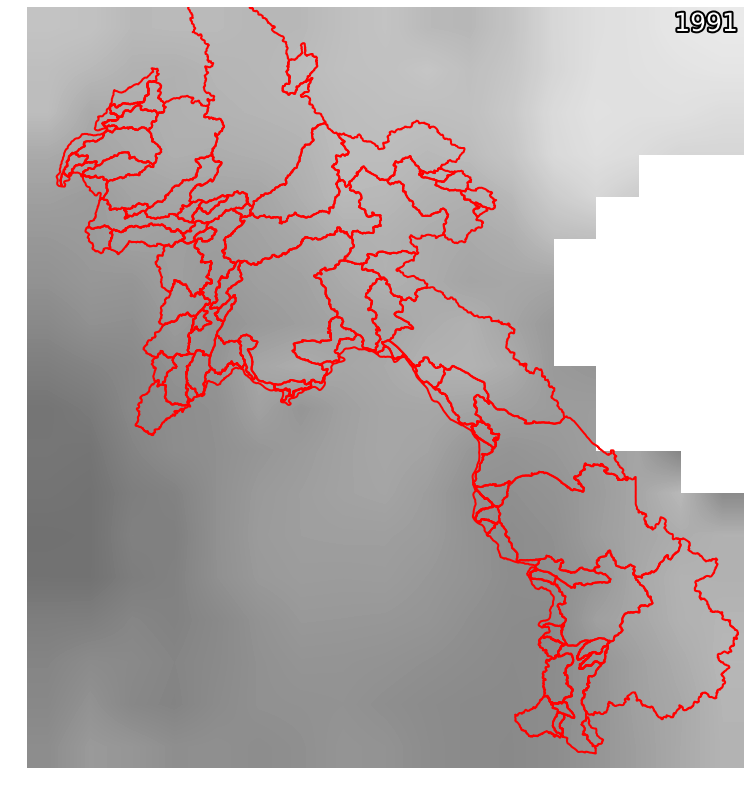

In [21]:
DEAPlotting.animated_timeseries(ds = ds,output_path=out_file, bands = ['PET'],
                                time_dim = 'time', x_dim = 'longitude',y_dim = 'latitude',
                                show_date= False, onebandplot_cbar=False,
                                title= ds.time.dt.year.values.tolist(),
                                shapefile_path = shape_file,shapefile_kwargs = {'linewidth':2,
                                                                                 'edgecolor':'red', 
                                                                                 'facecolor':"#00000000"},
                                #onebandplot_kwargs={'cmap':'Blues','vmin':0, 'vmax':1}, 
                                interval=1000)

In [17]:
one_band_image_subplots(ds, 4, figsize = [40,800], left  = 0.125, 
                              right = 0.9, bottom = 0.1, top = 0.9, 
                              wspace = 0.2, hspace = 0.4)

<Figure size 2880x57600 with 0 Axes>